In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sqlite3 as db
import sys
import json
import requests
import logging


In [24]:
logger = logging.getLogger()

In [25]:
con = db.connect('Data_sicence_SQL.db')

In [26]:
df = pd.read_csv(r'C:\Users\Max\TUC python\Kunskapskontroll 3\ds_salaries.csv')

In [27]:
df.to_sql('ds_salaries.csv', con, if_exists='replace')

3755

In [28]:
API_KEY = "929ce405b668474ea251cb0f2cb4764b"  

def bail(message):
    logger.error(message)
    sys.exit(1)

def fetch_exchange_rate():
    url = f"https://api.currencyfreaks.com/v2.0/rates/latest?apikey={API_KEY}"
    try:
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception(f"Failed to fetch currencies: {response.text}")
    except Exception as e:
        raise Exception(f"Failed to fetch currencies: {str(e)}")
    
    payload = json.loads(response.text)
    try:
        sek_rate = float(payload["rates"]["SEK"])  # Hämta SEK-växelkursen
    except KeyError:
        raise Exception("SEK rate not found in API response")
    
    return sek_rate

def convert_salaries_to_sek(salaries_df, sek_rate):
    try:
        # Lägg till en ny kolumn med omvandlade löner
        salaries_df["salary_in_sek"] = round(salaries_df["salary_in_usd"] * sek_rate)
    except Exception as e:
        raise Exception(f"Failed to convert salaries: {str(e)}")
    return salaries_df

# def export_to_database(df):
#      try:
#          con = db.connect("data_sicence_SQL.db")
#          df.to_sql("Data_sicence_SQL.db", con, if_exists="replace", index=False)
#         #  con.close()
#      except Exception as e:
#          raise Exception(f"Failed to export to database: {str(e)}")

if __name__ == "__main__":
    logging.basicConfig(filename="salaries.log", level=logging.INFO, format="%(asctime)s %(levelname)s: %(message)s")
    logger = logging.getLogger()
    
    try:
        # Steg 1: Hämta SEK-växelkursen
        sek_rate = fetch_exchange_rate()
        logger.info(f"Fetched SEK exchange rate: {sek_rate}")
        
        # Steg 2: Läs in löner från CSV
        salaries_df = pd.read_csv("ds_salaries.csv")
        if "salary_in_usd" not in salaries_df.columns:
            raise Exception("CSV file must contain 'salary_in_usd' column")
        
        # Steg 3: Omvandla löner till SEK
        salaries_df = convert_salaries_to_sek(salaries_df, sek_rate)
        
        # Steg 4: Exportera data till SQLite-databas
        # export_to_database(salaries_df)
        
        logger.info("Salaries converted and exported successfully")
    except Exception as e:
        bail(str(e))


In [29]:
# Ändra "experience level" från förkortning till fulla ord.
salaries_df['experience_level'] = salaries_df['experience_level'].replace({"EN": "Entry-level", "SE": "Senior-level", "MI": "Mid-level", "EX": "Expert-level"})



In [30]:
# Ändra "employee-type" från förkortning till fulla ord.
unique_values = salaries_df["employment_type"].unique()

print(unique_values)

salaries_df["employment_type"] = salaries_df["employment_type"].replace({"FT": "Full-time", "CT": "Consultant", "FL": "Freelancer", "PT": "Part-time"})





['FT' 'CT' 'FL' 'PT']


In [43]:
salaries_df.columns

salaries_df['employee_residence'] = salaries_df['employee_residence'].replace({"ES": "Spain", "US": "United States", "CA": "Canada", "DE": "Germany", "GB": "Great Britain", "NG": "Nigeria", "IN": "India", "HK": "Hong Kong", "PT": "Portugal", "NL": "Netherlands", "CH": "Switzerland", "CF": "Central African Republic", "FI": "Finland", "UA": "Uruguay", "IE": "Republic of Ireland", "IL": "Israel", "GH": "Ghana", "AT": "Austria", "CO":"Colombia", "SG":"Singapore", "SE": "Sweden", "SI": "Slovenia", "MX": "Mexico", "UZ": "Uzbekistan", "HR": "Croatia", "PL": "Poland", "KW": "Kuwait", "VN": "Vietnam", "CY": "Cypern", "AR": "Argentina", "AM": "Armenia", "BA": "BosniaandHerzegovina", "KE": "Kenya", "GR": "Greece", "MK": "NorthMacedonia", "LV": "Latvia", "IT": "Italy", "MA": "Morocco", "LT": "Lithuania", "BE": "Belgium", "AS": "AmericanSamoa", "IR":"Iran", "HU": "Hungary", "SK": "Slovakia", "CN": "China", "CZ": "CzechRepublic", "CR": "CostaRica", "TR": "Turkey", "DK": "Denmark", "BO": "Bolivia", "PH": "Philippines", "DO": "DominicanRepublic", "EG": "Egypt", "ID": "Indonesia", "AE": "UnitedArabEmirates", "MY": "Malaysia", "JP": "Japan", "EE": "Estonia", "HN": "Honduras", "TN": "Tunisia", "IQ": "Iraq", "BG": "Bulgaria", "JE": "Jordanien", "RS": "Serbia", "NZ": "NewZealand", "MD": "Moldova", "LU": "Luxenbourg", "MT": "Malta"}).str.upper()



In [42]:
salaries_df["company_location"] = salaries_df["company_location"].replace({
    "ES": "SPAIN", "US": "UNITED STATES", "CA": "CANADA", "DE": "GERMANY",
    "GB": "GREAT BRITAIN", "NG": "NIGERIA", "IN": "INDIA", "HK": "HONG KONG",
    "NL": "NEDERLÄNDERNA", "CH": "SWITZERLAND", "CF": "CENTRAL AFRIKAN REPUBLIC",
    "FR": "FRANKRIKE", "FI": "FINLAND", "UA": "URUGUAY",
    "IE": "REPUBLIC OF IRELAND", "IL": "ISRAEL", "GH": "GHANA",
    "CO": "COLOMBIA", "SG": "SENEGAL", "AU": "AUSTRALIA",
    "SE": "SWEDEN", "SI": "SLOVENIA", "MX": "MEXICO", "BR": "BRASIL",
    "PT": "PORTUGAL", "RU": "RUSSIA", "TH": "THAILAND", "HR": "CROATIA",
    "VN": "VIETNAM", "EE": "ESTONIA", "AM": "ARMENIA", "BA": "BOSNIA AND HERZEGOVINA",
    "KE": "KENYA", "GR": "GREECE", "MK": "MACEDONIA", "LV": "LATVIA", "RO": "ROMANIA",
    "PK": "PAKISTAN", "IT": "ITALY", "MA": "MALTA", "PL": "POLAND", "AL": "ALBANIA",
    "AR": "ARGENTINA", "LT": "LITHUANIA", "AS": "ANTARCTICA", "CR": "COSTA RICA",
    "IR": "IRAN", "BS": "BAHAMAS", "HU": "HUNGARY", "AT": "AUSTRIA", "SK": "SLOVAKIA",
    "CZ": "CZECH REPUBLIC", "TR": "TURKEY", "PR": "PUERTO RICO", "DK": "DENMARK",
    "BO": "BOLIVIA", "PH": "PHILIPPINES", "BE": "BELGIUM", "ID": "INDONESIA",
    "EG": "EGYPT", "AE": "UNITED ARAB EMIRATES", "LU": "LUXEMBOURG", "MY": "MALAYSIA",
    "HN": "HONDURAS", "JP": "JAPAN", "DZ": "ALGERIA", "IQ": "IRAQ", "CN": "CHINA",
    "CL": "CHILE", "MD": "MOLDOVA", "MT": "MALTA", "NZ": "NEW ZEALAND"}).str.upper()



In [44]:
salaries_df.to_sql("salaries", con, if_exists="replace")

3755

In [ ]:
start_year = 2022
end_year = 2022

df[(df["work_year"] >= start_year) & (df["work_year"] <= end_year)]



In [14]:
filterd_df = df[["work_year", "remote_ratio"]]

In [ ]:


# count_2022 = filterd_df[(filterd_df["remote_ratio"] == 100) & (filterd_df["work_year"] == 2021).shape[0]]

filterd_df.groupby(["work_year", "remote_ratio"]).size()




In [51]:
new_df = pd.DataFrame({"work_year": [2020, 2021, 2022, 2023], "remote_ratio": [39, 120, 891, 593]})

new_df


,work_year,remote_ratio
0,2020,39
1,2021,120
2,2022,891
3,2023,593


In [ ]:
print(df.loc[[0, 1]])

<Axes: xlabel='work_year'>

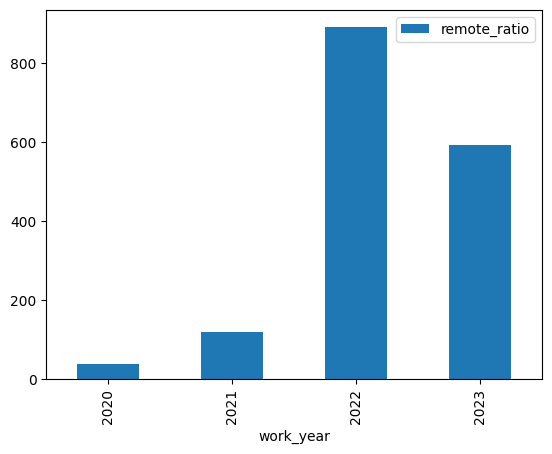

In [50]:
new_df.plot(kind="bar", x = "work_year", y = "remote_ratio")




In [ ]:

new_df = df.to_sql("Data_sicence_SQL.db", con, if_exists="replace")

print(new_df)




In [ ]:
try:
    con = db.connect('Data_sicence_SQL.db')
    print("Anslutning lyckades!")
except db.Error as e:
    print(f"Fel vid anslutning: {e}")
#finally:
    #if 'con' in locals():
    #con.close()

In [52]:
print("employee_residence")

['FT' 'CT' 'FL' 'PT']
